<a href="https://colab.research.google.com/github/dong-uk-kim97/Datatone/blob/main/Exploration_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정면 사진

## 필요한 라이브러리 불러오기

In [145]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

## 사진 불러오기

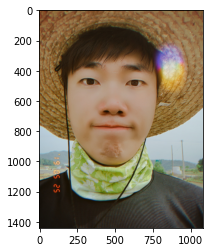

In [146]:
# opencv로 이미지 불러오기
my_image_path1 = '/content/drive/MyDrive/KakaoTalk_20220809_123834002.jpg'
img_bgr = cv2.imread(my_image_path1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # cv2는 bgr값을 사용하기 때문에 우리가 아는 RGB값으로 바꾸는 작업을 진행한다.
img_show = img_bgr.copy()
plt.imshow(img_rgb)
plt.show()

## 얼굴 검출

In [147]:
# HOG Detector 선언
detector_hog = dlib.get_frontal_face_detector()

In [148]:
# Bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(132, 280) (798, 946)]]


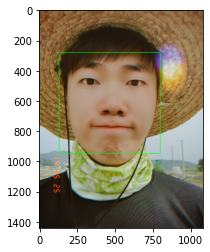

In [149]:
# 찾은 얼굴 영역 좌표
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 랜드마크

Aiffel 클라우드에 있는 모델을 다운로드 받아서 구글 드라이브에 업로드를 진행했다.

In [150]:
# landmark_predictor 모델
model_path = '/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [151]:
# landmar 찾기
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


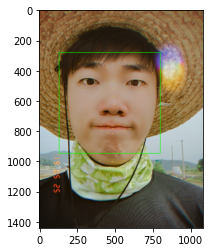

In [152]:
# landmark 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [153]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(494, 624)
(x,y) : (494,291)
(w,h) : (667,667)


## 스티커 적용하기

In [154]:
sticker_path = '/content/drive/MyDrive/24674.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(667, 667, 3)


In [155]:
# 스티커 이미지 좌표
refined_x = x - w // 2 # left
refined_y = h - y # bottom
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (161,376)


In [156]:
# y좌표가 음수일 때, -y만큼 이미지를 잘라준 후 경계값은 0으로 설정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (161,376)


In [157]:
# 원본에 스티커 적용 및 투명도 조절
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0) 
# cv2.addWeighted를 사용해서 스티커 사진의 투명도 조절

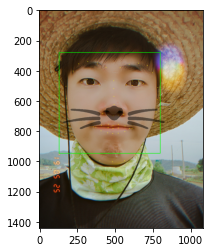

In [158]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

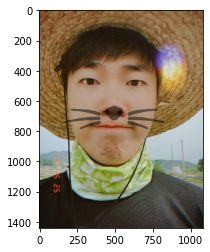

In [159]:
# Bounding box 제거한 결과 이미지 출력
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 출처

https://ceuity.tistory.com/7

# 회고

opencv 라이브러리를 활용해서 스티커 사진을 만들어봤다. 좌표값을 활용해서 원본 사진에 스티커 사진을 더하는 것이 신기했다. cv2.addWeighted에 대해서 좀 더 공부를 해야겠다고 생각했다.

- 얼굴 각도에 따라 스티커가 어떻게 변해야할까? \
→ 아마도 벡터 연산을 통해서 진행을 해야할 것 같다. \
- 멀리서 촬영하면 왜 안될까? 옆으로 누워서 촬영하면 왜 안될까? \
→ bounding box가 잘 작동하지 않을 수 있기 때문이라고 생각한다. \
- 실행속도가 중요할까? \
→ 당연히 중요하다. 왜냐하면 사용자가 답답함을 느끼면 이러한 프로그램을 만들어도 사용하지 않을 가능성이 농후하기 때문이다. \
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요? \
→ 정확하지 않으면 사람들이 이용하지 않을 것이기 때문에 실행속도도 중요하지만 정확도가 가장 우선되어야 한다고 생각한다.
